# Adaptive Intelligence COM3240
## Lab 1: Learning and Remembering with the Hebbian rule

### Lecturers and Lab Assistants###

- Prof. Eleni Vasilaki ~ e.vasilaki@sheffield.ac.uk
- Avgoustinos Vouros ~ avouros1@sheffield.ac.uk
- Fariba Yousefi ~ f.yousefi@sheffield.ac.uk
- Harry Jackson ~ hjackson3@sheffield.ac.uk
- Daniel Camilleri ~ d.camilleri@sheffield.ac.uk

### Lab Organisation
- Task presentation and brief overview of few useful concepts you saw during the lecture.
- You will be given a code you can run and play with and you will be asked to answer few basic questions about it.
- You can finish the task at home for next week.

### Learning Outcomes
- Start to be familiar with some Python / MATLAB tools.
- Understand the role of Hebbian learning rule.
- Understand the difference between Hebbian and anti-Hebbian.

## Lecture Overview

### The task: Learn and remember an object

Remembering implies storing and retrieving information:
- Phase I: Learning
- Phase II: Recalling

<img src='./icons/gif/lab1_an1.gif'>

### Hebbian Learning
Connections can change depending on the activity of the two neurons involved: 

Annotation: The change in the weight of the connection **from** neuron 1 to neuron 2 $w$ is equal to a function where one term is the product of the positive learning rate $\gamma$, the **presynaptic** neuron 1 $v_1$ and **postsynaptic** neuron 2 $v_2$.

$$\begin{align}
\Delta w_{12} =w^{new}_{12} - w^{old}_{12} =f\left(\gamma, v_1, v_2\right), && \gamma v_1 v_2, && \gamma > 0
\end{align}$$

The simplest rule is where the product is the only term (aka the minimal Hebbian rule):

$$\begin{align}
w^{new}_{12} = w^{old}_{12} + \gamma v_1 v_2
\end{align}$$

<img src='./icons/notes_fig1.jpg'>

### Anti-Hebbian Learning
By applying the opposite change to a connection, we can erase what we have previously learnt: 
$$\begin{align}
w^{new}_{12} = w^{old}_{12}  - \gamma v_1 v_2 && \gamma >0
\end{align}$$

<img src='./icons/notes_fig2.jpg'>

### Input and output signals
**Unless** directly injected into the neuron, inputs come from other neurons through synapses:
<img src='./icons/input_and_output_signals_1.png'>

A two-step process takes place in the neuron whenever an input signal is registered.

<img src='./icons/input_and_output_signals_2.png'>

$I_A = W_AV_A \text{ and } I_B = W_BV_V \Rightarrow I_{TOT}= I_{external} + I_A + I_B =I_{external} + W_A V_A + W_B V_B =I_{external} + [W_A W_B]\begin{bmatrix} V_A \\ V_B \end{bmatrix} $

**Conceptual meaning:** if the total input received is too small it does not wake up the neuron, whereas the more the input increases above the threshold θ the more the neuron will be active up to a certain maximum value.

High connection increases the input, which in turn makes the firing more likely.

<img src='./icons/input_and_output_signals_3.png'>

After n loop iterations presenting the input image, the activity ν of all neurons reproduces the input pattern.

If the total input for a neuron recieved is less than the threshold, it doesn't wake up
$$I_{TOT} < \theta \Rightarrow 0$$
If the total input for a neuron is above the the threshold, it will be active up to a certain value
$$I_{TOT} \geq \theta \wedge I_{TOT} - 0 < V_{max}\Rightarrow I_{TOT} - 0$$
$$I_{TOT} \geq \theta \wedge I_{TOT} - 0 \geq V_{max}\Rightarrow V_{max}$$

## Laboratory 1: Learning and Remembering with the Hebbian rule

### Questions:
1. Detect which part of the code implements the Hebbian learning rule.
2. Detect which part of the code implements the semi-linear neuron.
3. Identify the value of the threshold θ used in the semi-linear neuron model.
4. Change the value of the variable 'external_signal' from 2 to 0.5. Describe what happens and why.
5. Implement Anti-Hebbian learning to erase the letter 'H' and learn a new letter (i.e. 'T').

In [9]:
# Loading libraries
import numpy as np                # docs.scipy.org/doc/numpy-1.10.0/reference/
import matplotlib.pyplot as plt   # matplotlib.org/api/pyplot_summary.html

%matplotlib inline

### Hebbian Learner
<a href="#Hebbian-Learning">We implement this</a>

In [2]:
# Define the input - a matrix of pixels displaying an alphabetical letter
letterH = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                    [0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0],
                    [0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0],
                    [0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0],
                    [0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0],
                    [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
                    [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
                    [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
                    [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
                    [0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0],
                    [0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0],
                    [0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0],
                    [0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0],
                    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])
class Hebbian_Learner:
    def __init__(self, in_pixels, threshold=1,freq_max = 10):
        self.freq_max=freq_max
        self.threshold=threshold
        self.in_pixels = in_pixels
        [self.m, self.n] = self.in_pixels.shape #dimensions of input matrix: self.m is umber of rows, self.n is number of columns
        self.N = np.size(self.in_pixels) #(self.N = self.m*self.n) number of pixels == number of neurons in network behind input
                                        #each neuron corresponds to one pixel

        # Display the input

        fig, ax = plt.subplots(figsize = (6, 8)) # opens a separate window where to plot the figure and assigns it a title
        # creates a 2-dimensional image of a matrix by assigning a colour to each value of the matrix depending on the value itself:
        # high values-->brighter, low values-->darker 
        # interpolation = 'nearest' -> removes blurry effect due to interpolation
        # cmap = 'viridis'           -> selects the scale of colours we want to use
        img = ax.imshow(self.in_pixels, interpolation='nearest', cmap='viridis')

        ax.set_title('Input', fontsize=15);  # assign title to figure;

        # Add colorbar
        # This just makes the cmap to be shown properly rather than overlapping onto the plots
        from mpl_toolkits.axes_grid1 import make_axes_locatable
        divider = make_axes_locatable(plt.gca())
        cax = divider.append_axes('right', "5%", pad = "3%")
        cm = fig.colorbar(img, cax =  cax)  # displays the color bar
    
    def input_operation(self, external_input, external_signal=1):
        """ rearrange the self.N elements of the m-by-n matrix of external inputs into a vector self.N by 1,
            to simplify operations"""
        return external_signal*np.reshape(external_input, (self.N,1))
    
    """           gamma: learning rate
             w_init_max: maximum initial weights, just needed for initialisation
        external_signal: maximum intensity of the pixels
                  niter: number of iterations
                 forget: Enables anti-hebbian rule by making the product term negative.
    """

    
    def train_forget(self, gamma = 0.01,w_init_max = 0.0005,external_signal = 2,niter = 10, forget=False):
        # Initial conditions
        """ initial weights matrix: each neuron is connected with every other neurons through a random connection 
            between 0 and w_init_max """
        self.w = w_init_max * np.random.rand(self.N,self.N) #These are the weights from the pre-synaptic neurons (those that "sensed" each pixel) to the post-synaptic neurons.
        # set to zero all elements on the principal diagonal (auto interaction)
        np.fill_diagonal(self.w,0)
        
        # initial value of the firing rate-->zero
        neurons_freq = np.zeros([self.N,1]) #These are the post-synaptic neurons
        """ each neuron receives or not an external input equal to external_signal depending whether the pixel it 
            correspnds to is active (1) or not (0) """ 
        external_input = external_signal * self.in_pixels
        #Rehsape the input vector
        external_input = self.input_operation(external_input) #These are the Pre-Synaptic Neurons

        # Training loop
        for j in range(niter):
            #I_{TOT} = I_{external} + [W_A W_B]\begin{bmatrix} V_A \\ V_B \end{bmatrix}
            neurons_total_input = external_input + np.dot(self.w, neurons_freq)
            neurons_output = np.maximum((neurons_total_input - self.threshold), 0) #New firing rates $I_{TOT} = \theta$ or 0
            neurons_freq = np.minimum(neurons_output, self.freq_max)           #New firing rates must be no greater than V_max
            
            #Minimal hebbian or anti-hebbian rule. Weights are strengthened or weakened, respectively.
            self.w = self.w + (-1 if forget else 1) * gamma * np.dot(neurons_freq, neurons_freq.T)
            self.w = np.maximum(self.w, 0) #no negative weights are allowed
            
            np.fill_diagonal(self.w,0) #set to zero all elements on the principal diagonal (auto interaction)


        # Display the output
        out_pixels = np.reshape(neurons_freq, (self.n, self.m)) # inverse conversion from vector to self.n x self.m matrix

        fig, ax = plt.subplots(figsize = (6, 8)) # opens a separate window where to plot the figure and assigns it a title
        # creates a 2-dimensional image of a matrix by assigning a colour to each value of the matrix depending on the value itself:
        # high values-->brighter, low values-->darker 
        # interpolation = 'nearest' -> removes blurry effect due to interpolation
        # cmap = 'viridis'           -> selects the scale of colours we want to use
        self.img = ax.imshow(out_pixels, interpolation='nearest', cmap='viridis')

        ax.set_title('Firing rates after training', fontsize=15);  # assign title to figure;

        # Add colorbar
        # This just makes the cmap to be shown properly rather than overlapping onto the plots
        from mpl_toolkits.axes_grid1 import make_axes_locatable
        divider = make_axes_locatable(plt.gca())
        cax = divider.append_axes('right', "5%", pad = "3%")
        cm = fig.colorbar(self.img, cax =  cax) # displays the color bar

    def recall(self,external_signal=2, niter=10):
        # let a partial version of the image be the input
        # This is done with the element-wise product of the image (self.in_pixels) and a matrix of random 0s and 1s.
        partial_input = self.in_pixels * np.random.randint(2, size=(self.m,self.n))

        # This is what the partial input looks like
        fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize =(12, 14))
        img1 = ax1.imshow(partial_input, interpolation='nearest', cmap='viridis')
        ax1.set_title('Partial Input', fontsize=15)

        # Recalling operation
        """ The external input vector, done by reshaping the partial input to an N by 1 vector but also decreasing the intensity
            using the external signal"""
        external_input_partial = self.input_operation(partial_input,external_signal)
        
        #As with the training; initial value of the firing rate-->zero
        neurons_freq_new = np.zeros([self.N,1])

        for j in range(niter):
            """ If the total input for each neuron recieved is too small, their respective neurons don't wake up
                $I_{TOT} < \theta \Rightarrow 0 is equivalent to \text{argmax}\left(I_{TOT}-\theta,0 \right)$"""
            neurons_freq_new = np.maximum(((external_input_partial + np.dot(self.w, neurons_freq_new)) - self.threshold), 0)
            """ If the total input for a neuron is above the the threshold, it will be active up to a certain value
                $I_{TOT} \geq \theta \wedge I_{TOT} - 0 < V_max\Rightarrow I_{TOT} - 0$
                $I_{TOT} \geq \theta \wedge I_{TOT} - 0 \geq V_max\Rightarrow V_max$"""
            neurons_freq_new = np.minimum(neurons_freq_new, self.freq_max)


        # Display the output
        out_pixels_reconstruction = np.reshape(neurons_freq_new, (self.n, self.m))


        img2 = ax2.imshow(out_pixels_reconstruction, interpolation='nearest', cmap='viridis')
        ax2.set_title('Recalled output', fontsize=15)

        fig.subplots_adjust(right=0.8)

        # This just makes the cmap to be shown properly rather than overlapping onto the plots
        from mpl_toolkits.axes_grid1 import make_axes_locatable
        divider = make_axes_locatable(plt.gca())
        cax = divider.append_axes('right', "5%", pad = "3%")
        cm = fig.colorbar(self.img, cax =  cax)


        # Make the colors for images match the colorbar range
        img1.set_clim(vmin=0, vmax=self.freq_max)
        img2.set_clim(vmin=0, vmax=self.freq_max)
        cm.set_clim(vmin=0, vmax=self.freq_max)

        fig.tight_layout()

Instantiate new Hebbian Learner

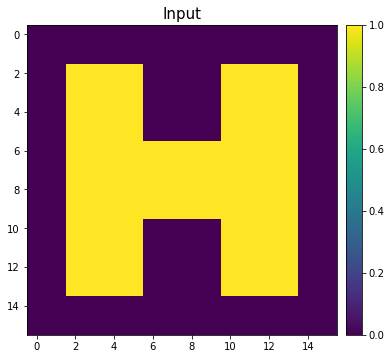

In [10]:
learner = Hebbian_Learner(letterH)

Train

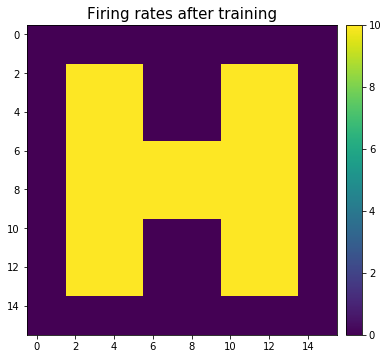

In [11]:
learner.train_forget()

Recall

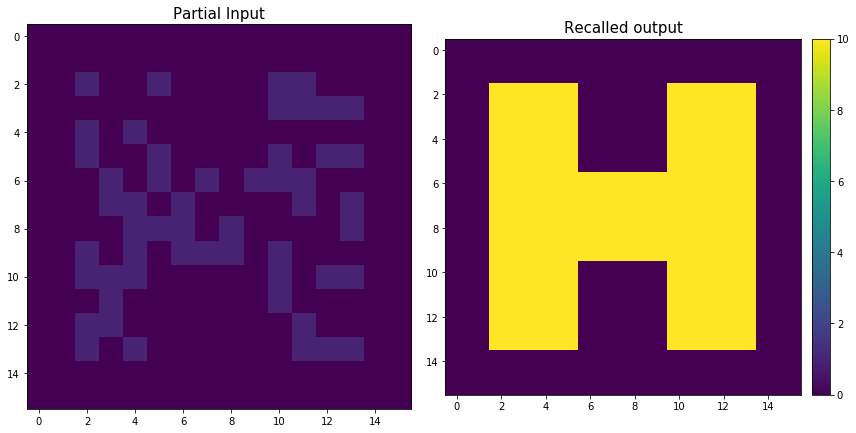

In [12]:
learner.recall()

### Part 3: Forgetting image via Anti-Hebb rule

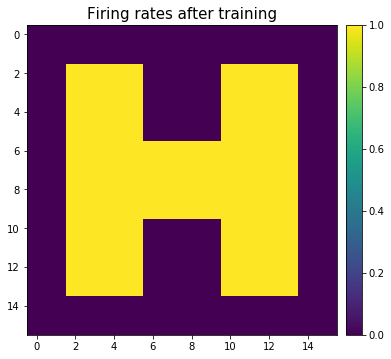

In [13]:
learner.train_forget(forget=True)

### Part 4: Demonstrating that the image is erased 

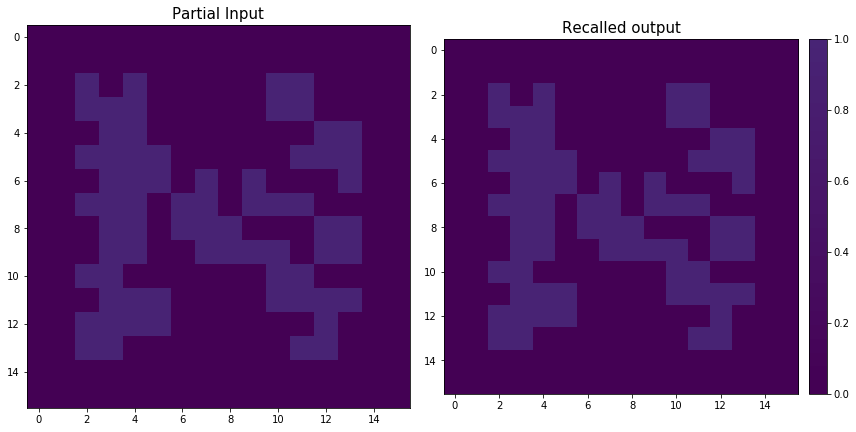

In [14]:
learner.recall()

### Part 5: Learning a New Letter

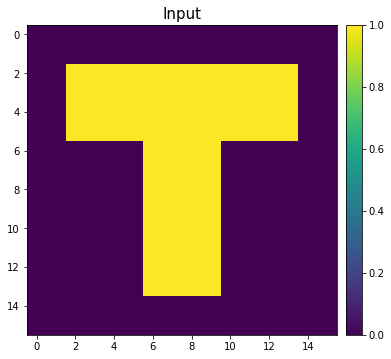

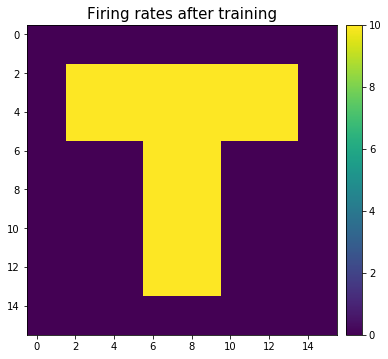

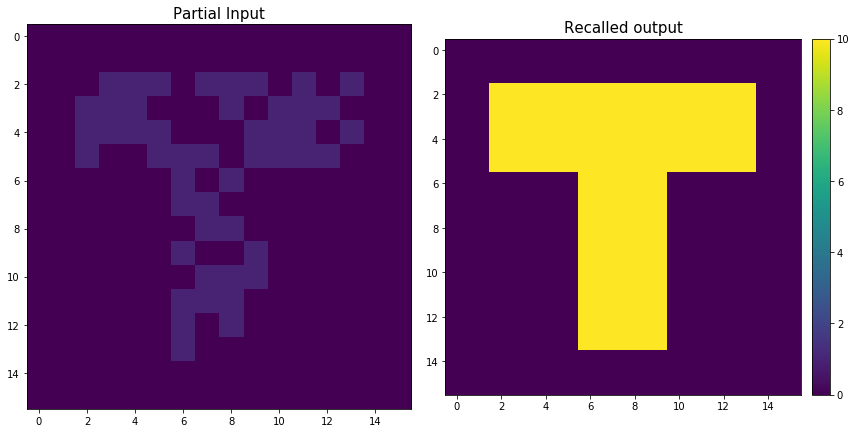

In [15]:
letterT = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                    [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
                    [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
                    [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
                    [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
                    [0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
                    [0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
                    [0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
                    [0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
                    [0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
                    [0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
                    [0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
                    [0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
                    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])
learner = Hebbian_Learner(letterT)
learner.train_forget()
learner.recall()